In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

warnings.filterwarnings('ignore')

#### 差异

In [2]:
xgb = pd.read_csv('C:/Users/f3107/Desktop/hy_data/2020年2月6日/result_0206_xgb.csv',header=None)
xgb.columns = ['ship_ID','type']
lgb = pd.read_csv('C:/Users/f3107/Desktop/hy_data/2020年2月6日/result_0206_lgb.csv',header=None)
lgb.columns = ['ship_ID','type']

In [3]:
le = preprocessing.LabelEncoder()
le.fit(xgb.type)
xgb.type = le.transform(xgb.type)
lgb.type = le.transform(lgb.type)

In [4]:
le.inverse_transform([0,1,2])

array(['刺网', '围网', '拖网'], dtype=object)

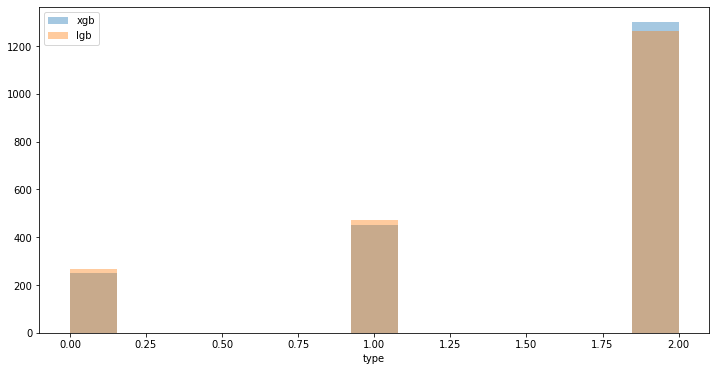

In [11]:
plt.figure(figsize = (12,6))

sns.distplot(xgb.type, kde = False, label = 'xgb')
sns.distplot(lgb.type, kde = False, label = 'lgb')

plt.legend()

In [17]:
c = pd.merge(xgb, lgb, on = 'ship_ID')

In [18]:
c.head()

,ship_ID,type_x,type_y
0,7000,1,1
1,7001,2,2
2,7002,1,1
3,7003,2,2
4,7004,1,1


In [13]:
c.columns = ['ship_ID','result','result_del_ship']

In [14]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0

In [15]:
c['bool'] = c.apply(lambda c : function(c['result'],c['result_del_ship']),axis = 1)

In [ ]:
# 0:'刺网', 1:'围网', 2:'拖网'

In [16]:
c[c['bool'] == 0]

,ship_ID,result,result_del_ship,bool
6,7006,2,1,0
9,7009,2,1,0
40,7040,1,2,0
65,7065,1,0,0
75,7075,2,1,0
85,7085,2,1,0
99,7099,1,0,0
116,7116,2,1,0
119,7119,2,0,0
186,7186,0,1,0


In [ ]:
import shutil

for i in range100:
    
    shutil.copy(f'C:/Users/f3107/Desktop/hy_data/figs/total/[{i}].png', f'C:/Users/f3107/Desktop/hy_data/figs/100/[{i}].png') 